In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

In [2]:
# loading the datasets

match = pd.read_csv("match.csv")

delivery = pd.read_csv("deliveries.csv")

## Exploratory Data Analysis

In [3]:
# checking number of rows and number of columns in each dataframe

print("match dataframe:", match.shape,"\n\n"+"delivery dataframe:", delivery.shape)

match dataframe: (950, 20) 

delivery dataframe: (225954, 17)


|Dataframe Name|Rows|Columns|
|:-:|:-:|:-:|
|match|950|20|
|delivery|225,954|17|

In [4]:
# checking first five rows

match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [5]:
# checking first five rows

delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
# creating copies of original datarames

match1 = match.copy()

delivery1 = delivery.copy()

In [7]:
# checking column information

match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [8]:
# renaming columns

match1 = match1.rename({"ID": "id", "City": "city", "Date": "date", "Season": "season",\
                        "MatchNumber": "match_number","Team1": "team1", "Team2": "team2", "Venue": "venue",\
                        "TossWinner": "toss_winner","TossDecision": "toss_decision", "SuperOver": "super_over",\
                        "WinningTeam": "winning_team","WonBy":"won_by", "Margin": "margin",\
                        "method": "D/L_method_used", "Player_of_Match": "player_of_match",\
                        "Team1Players": "team1_players", "Team2Players": "team2_players",\
                        "Umpire1": "umpire1", "Umpire2": "umpire2"}, axis = 1)


In [9]:
# checking column information

delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [10]:
# renaming columns

delivery1 = delivery1.rename({"ID": "id", "ballnumber": "ball_number", "non-striker": "non_striker",\
                              "extras_run": "extra_run", "total_run": "runs_per_ball",\
                              "isWicketDelivery": "is_wicket_delivery", "BattingTeam": "batting_team"}, axis = 1)

In [11]:
# calculating null values for each column

print("Column Name".ljust(18), "Sum of Null Values".ljust(21), "Percentage of Null Values")
print("_"*67)

for i in match1.columns:
    print(i.ljust(18), str(match1[i].isna().sum()).ljust(19),\
          round(match1[i].isna().sum()/match1.shape[0], 2) * 100)

Column Name        Sum of Null Values    Percentage of Null Values
___________________________________________________________________
id                 0                   0.0
city               51                  5.0
date               0                   0.0
season             0                   0.0
match_number       0                   0.0
team1              0                   0.0
team2              0                   0.0
venue              0                   0.0
toss_winner        0                   0.0
toss_decision      0                   0.0
super_over         4                   0.0
winning_team       4                   0.0
won_by             0                   0.0
margin             18                  2.0
D/L_method_used    931                 98.0
player_of_match    4                   0.0
team1_players      0                   0.0
team2_players      0                   0.0
umpire1            0                   0.0
umpire2            0                   0.0


In [12]:
# calculating null values for each column

print("Column Name".ljust(18), "Sum of Null Values".ljust(21), "Percentage of Null Values")
print("_"*67)

for i in delivery1.columns:
    print(i.ljust(18), str(delivery1[i].isna().sum()).ljust(19),\
          round(delivery1[i].isna().sum()/delivery1.shape[0], 2) * 100)

Column Name        Sum of Null Values    Percentage of Null Values
___________________________________________________________________
id                 0                   0.0
innings            0                   0.0
overs              0                   0.0
ball_number        0                   0.0
batter             0                   0.0
bowler             0                   0.0
non_striker        0                   0.0
extra_type         213905              95.0
batsman_run        0                   0.0
extra_run          0                   0.0
runs_per_ball      0                   0.0
non_boundary       0                   0.0
is_wicket_delivery 0                   0.0
player_out         214803              95.0
kind               214803              95.0
fielders_involved  217966              96.0
batting_team       0                   0.0


## Imputing Null Values

In [13]:
# checking for unique values and their respective counts including null

match1["D/L_method_used"].value_counts(dropna = False)

NaN    931
D/L     19
Name: D/L_method_used, dtype: int64

The "NaN" values in the above code cell represent that D/L method is not used in those matches. If it is used, then it is represented as "D/L"

In [14]:
# replacing "D/L" values with "Yes", if D/L method is used

match1["D/L_method_used"] = match1["D/L_method_used"].replace("D/L", "Yes")

In [15]:
# replacing null values with "No"

match1["D/L_method_used"] = match1["D/L_method_used"].fillna("No")

In [16]:
match1["D/L_method_used"].value_counts(dropna = False)

No     931
Yes     19
Name: D/L_method_used, dtype: int64

In [17]:
# checking the venue of rows where city is null

match1[match1["city"].isnull()]["venue"].unique()

array(['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium'],
      dtype=object)

In [18]:
match1["city"].value_counts(dropna = False)

Mumbai            159
Kolkata            79
Delhi              78
Chennai            67
Bangalore          65
Hyderabad          64
Chandigarh         56
Pune               51
NaN                51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Bengaluru          15
Durban             15
Visakhapatnam      13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Dharamsala          9
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [19]:
# replacing null values of city based on venue

match1.loc[match1["venue"] == "Dubai International Cricket Stadium", "city"] = "Dubai"

In [20]:
# replacing null values of city based on venue

match1.loc[match1["venue"] == "Sharjah Cricket Stadium", "city"] = "Sharjah"


In [21]:
# checking respective cities and venue

match1.loc[(match1["venue"] == "Sharjah Cricket Stadium") |\
           (match1["venue"] == "Dubai International Cricket Stadium"), ["city", "venue"]]


,city,venue
74,Dubai,Dubai International Cricket Stadium
75,Sharjah,Sharjah Cricket Stadium
76,Sharjah,Sharjah Cricket Stadium
77,Dubai,Dubai International Cricket Stadium
78,Dubai,Dubai International Cricket Stadium
...,...,...
543,Sharjah,Sharjah Cricket Stadium
545,Sharjah,Sharjah Cricket Stadium
546,Dubai,Dubai International Cricket Stadium
547,Dubai,Dubai International Cricket Stadium


In [22]:
# matches with superover and no result have null values in margin column
# filling null values in margin column with '0' where superover is "Y"

match1.loc[match1["super_over"] == "Y", "margin"] = 0

In [23]:
# checking rows with null value in margin column

match1[match1["margin"].isnull()]

,id,city,date,season,match_number,team1,team2,venue,toss_winner,toss_decision,super_over,winning_team,won_by,margin,D/L_method_used,player_of_match,team1_players,team2_players,umpire1,umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,No,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,No,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,No,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,No,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [24]:
# dropping rows with null values in margin as the match did not take place

match1.dropna(subset = ["margin"], inplace = True)

In [25]:
match1.isna().sum()

id                 0
city               0
date               0
season             0
match_number       0
team1              0
team2              0
venue              0
toss_winner        0
toss_decision      0
super_over         0
winning_team       0
won_by             0
margin             0
D/L_method_used    0
player_of_match    0
team1_players      0
team2_players      0
umpire1            0
umpire2            0
dtype: int64

In [26]:
delivery1.isna().sum()

id                         0
innings                    0
overs                      0
ball_number                0
batter                     0
bowler                     0
non_striker                0
extra_type            213905
batsman_run                0
extra_run                  0
runs_per_ball              0
non_boundary               0
is_wicket_delivery         0
player_out            214803
kind                  214803
fielders_involved     217966
batting_team               0
dtype: int64

In [27]:
# checking unique values in extra_type column

delivery1["extra_type"].unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

The "NaN" values in the above code cell represents that it is a fair delivery.

In [28]:
# replacing null values with "none"

delivery1["extra_type"] = delivery1["extra_type"].fillna("none")

In [29]:
delivery1["player_out"].value_counts(dropna = False)


NaN                214803
RG Sharma             194
V Kohli               183
RV Uthappa            180
S Dhawan              179
                    ...  
AG Murtaza              1
IC Pandey               1
SMSM Senanayake         1
Sunny Gupta             1
AA Noffke               1
Name: player_out, Length: 574, dtype: int64

In [30]:
# replacing null values with "none"

delivery1["player_out"] = delivery1["player_out"].fillna("none")

In [31]:
delivery1["kind"].value_counts(dropna = False)

NaN                      214803
caught                     6837
bowled                     1944
run out                    1007
lbw                         685
stumped                     325
caught and bowled           323
hit wicket                   14
retired hurt                 13
obstructing the field         2
retired out                   1
Name: kind, dtype: int64

In [32]:
# replacing null values

delivery1["kind"] = delivery1["kind"].fillna("none")

In [33]:
delivery1["fielders_involved"].value_counts(dropna = False)

NaN                 217966
MS Dhoni               196
KD Karthik             182
AB de Villiers         141
RV Uthappa             133
                     ...  
TS Mills                 1
VG Arora                 1
PN Mankad                1
Anmolpreet Singh         1
NJ Maddinson             1
Name: fielders_involved, Length: 536, dtype: int64

In [34]:
# replacing null values

delivery1["fielders_involved"] = delivery1["fielders_involved"].fillna("none")

The "NaN" values in the above three code cells represent that no player got out in that delivery.

In [35]:
delivery1.isna().sum()

id                    0
innings               0
overs                 0
ball_number           0
batter                0
bowler                0
non_striker           0
extra_type            0
batsman_run           0
extra_run             0
runs_per_ball         0
non_boundary          0
is_wicket_delivery    0
player_out            0
kind                  0
fielders_involved     0
batting_team          0
dtype: int64

In [36]:
match1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               946 non-null    int64  
 1   city             946 non-null    object 
 2   date             946 non-null    object 
 3   season           946 non-null    object 
 4   match_number     946 non-null    object 
 5   team1            946 non-null    object 
 6   team2            946 non-null    object 
 7   venue            946 non-null    object 
 8   toss_winner      946 non-null    object 
 9   toss_decision    946 non-null    object 
 10  super_over       946 non-null    object 
 11  winning_team     946 non-null    object 
 12  won_by           946 non-null    object 
 13  margin           946 non-null    float64
 14  D/L_method_used  946 non-null    object 
 15  player_of_match  946 non-null    object 
 16  team1_players    946 non-null    object 
 17  team2_players   

In [37]:
delivery1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  225954 non-null  int64 
 1   innings             225954 non-null  int64 
 2   overs               225954 non-null  int64 
 3   ball_number         225954 non-null  int64 
 4   batter              225954 non-null  object
 5   bowler              225954 non-null  object
 6   non_striker         225954 non-null  object
 7   extra_type          225954 non-null  object
 8   batsman_run         225954 non-null  int64 
 9   extra_run           225954 non-null  int64 
 10  runs_per_ball       225954 non-null  int64 
 11  non_boundary        225954 non-null  int64 
 12  is_wicket_delivery  225954 non-null  int64 
 13  player_out          225954 non-null  object
 14  kind                225954 non-null  object
 15  fielders_involved   225954 non-null  object
 16  ba

In [38]:
match1.head()

,id,city,date,season,match_number,team1,team2,venue,toss_winner,toss_decision,super_over,winning_team,won_by,margin,D/L_method_used,player_of_match,team1_players,team2_players,umpire1,umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,No,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,No,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,No,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,No,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,No,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [39]:
delivery1.head()

,id,innings,overs,ball_number,batter,bowler,non_striker,extra_type,batsman_run,extra_run,runs_per_ball,non_boundary,is_wicket_delivery,player_out,kind,fielders_involved,batting_team
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,none,0,0,0,0,0,none,none,none,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,none,none,none,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,none,1,0,1,0,0,none,none,none,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,none,0,0,0,0,0,none,none,none,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,none,0,0,0,0,0,none,none,none,Rajasthan Royals


## Feature Engineering

In [40]:
# creating new dataframe with total runs for an innings

target_score_df = (delivery1.groupby(["id", "innings"]).sum()["runs_per_ball"] + 1).reset_index()

In [41]:
target_score_df.head()

,id,innings,runs_per_ball
0,335982,1,223
1,335982,2,83
2,335983,1,241
3,335983,2,208
4,335984,1,130


In [42]:
# renaming column

target_score_df = target_score_df.rename({"runs_per_ball": "target_score"}, axis = 1)

In [43]:
# filtering out 2 innings

target_score_df = target_score_df[target_score_df["innings"] == 1]

In [44]:
target_score_df.head()

,id,innings,target_score
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111


In [45]:
# merging dataframes on "id" column

match2 = match1.merge(target_score_df[["id", "target_score"]], left_on = "id", right_on = "id")


In [46]:
match2.head()

,id,city,date,season,match_number,team1,team2,venue,toss_winner,toss_decision,...,winning_team,won_by,margin,D/L_method_used,player_of_match,team1_players,team2_players,umpire1,umpire2,target_score
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,No,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,No,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,No,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,No,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,No,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


In [47]:
match2.columns

Index(['id', 'city', 'date', 'season', 'match_number', 'team1', 'team2',
       'venue', 'toss_winner', 'toss_decision', 'super_over', 'winning_team',
       'won_by', 'margin', 'D/L_method_used', 'player_of_match',
       'team1_players', 'team2_players', 'umpire1', 'umpire2', 'target_score'],
      dtype='object')

In [48]:
# checking for null values

match2.isna().sum()

id                 0
city               0
date               0
season             0
match_number       0
team1              0
team2              0
venue              0
toss_winner        0
toss_decision      0
super_over         0
winning_team       0
won_by             0
margin             0
D/L_method_used    0
player_of_match    0
team1_players      0
team2_players      0
umpire1            0
umpire2            0
target_score       0
dtype: int64

In [49]:
# checking unique team names

match2["team1"].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [50]:
# creating a list of playing teams

playing_teams = ['Rajasthan Royals', 'Royal Challengers Bangalore',\
                 'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',\
                 'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders', 'Punjab Kings', 'Mumbai Indians']


In [51]:
# replacing old team name with new team name

match2["team1"] = match2["team1"].str.replace("Delhi Daredevils", "Delhi Capitals")
match2["team2"] = match2["team2"].str.replace("Delhi Daredevils", "Delhi Capitals")


In [52]:
# replacing old team name with new team name

match2["team1"] = match2["team1"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")
match2["team2"] = match2["team2"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")


In [53]:
# replacing old team name with new team name

match2["team1"] = match2["team1"].str.replace("Kings XI Punjab", "Punjab Kings")
match2["team2"] = match2["team2"].str.replace("Kings XI Punjab", "Punjab Kings")


In [54]:
# replacing old team name with new team name

match2["team1"] = match2["team1"].str.replace("Gujarat Lions", "Gujarat Titans")
match2["team2"] = match2["team2"].str.replace("Gujarat Lions", "Gujarat Titans")


In [55]:
# dropping the teams which are not active

match2 = match2[match2["team1"].isin(playing_teams)]

In [56]:
match2.shape

(902, 21)

In [57]:
# dropping the teams which are not active

match2 = match2[match2["team2"].isin(playing_teams)]

In [58]:
match2.shape

(858, 21)

In [59]:
delivery1.head()

,id,innings,overs,ball_number,batter,bowler,non_striker,extra_type,batsman_run,extra_run,runs_per_ball,non_boundary,is_wicket_delivery,player_out,kind,fielders_involved,batting_team
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,none,0,0,0,0,0,none,none,none,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,none,none,none,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,none,1,0,1,0,0,none,none,none,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,none,0,0,0,0,0,none,none,none,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,none,0,0,0,0,0,none,none,none,Rajasthan Royals


In [60]:
# dropping the teams which are not active

delivery1 = delivery1[delivery1["batting_team"].isin(playing_teams)]

In [61]:
delivery1.shape

(161417, 17)

In [62]:
# verifying that respective changes took place

match2["team1"].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [63]:
# verifying that respective changes took place

match2["team2"].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings'], dtype=object)

In [64]:
match2["D/L_method_used"].value_counts()

No     843
Yes     15
Name: D/L_method_used, dtype: int64

In [65]:
# dropping rows where D/L method is used

match2 = match2[match2["D/L_method_used"] == "No"]

In [66]:
match2["D/L_method_used"].value_counts()

No    843
Name: D/L_method_used, dtype: int64

In [67]:
match2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 945
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               843 non-null    int64  
 1   city             843 non-null    object 
 2   date             843 non-null    object 
 3   season           843 non-null    object 
 4   match_number     843 non-null    object 
 5   team1            843 non-null    object 
 6   team2            843 non-null    object 
 7   venue            843 non-null    object 
 8   toss_winner      843 non-null    object 
 9   toss_decision    843 non-null    object 
 10  super_over       843 non-null    object 
 11  winning_team     843 non-null    object 
 12  won_by           843 non-null    object 
 13  margin           843 non-null    float64
 14  D/L_method_used  843 non-null    object 
 15  player_of_match  843 non-null    object 
 16  team1_players    843 non-null    object 
 17  team2_players   

In [68]:
delivery1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161417 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  161417 non-null  int64 
 1   innings             161417 non-null  int64 
 2   overs               161417 non-null  int64 
 3   ball_number         161417 non-null  int64 
 4   batter              161417 non-null  object
 5   bowler              161417 non-null  object
 6   non_striker         161417 non-null  object
 7   extra_type          161417 non-null  object
 8   batsman_run         161417 non-null  int64 
 9   extra_run           161417 non-null  int64 
 10  runs_per_ball       161417 non-null  int64 
 11  non_boundary        161417 non-null  int64 
 12  is_wicket_delivery  161417 non-null  int64 
 13  player_out          161417 non-null  object
 14  kind                161417 non-null  object
 15  fielders_involved   161417 non-null  object
 16  ba

In [69]:
# creating a dataframe with required columns

match2 = match2[["id", "city", "winning_team", "team1", "team2", "target_score"]]

In [70]:
# merging dataframes match2 and delivery1 based on "id" column

delivery2 = match2.merge(delivery1, on = "id")

In [71]:
delivery2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153013 entries, 0 to 153012
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  153013 non-null  int64 
 1   city                153013 non-null  object
 2   winning_team        153013 non-null  object
 3   team1               153013 non-null  object
 4   team2               153013 non-null  object
 5   target_score        153013 non-null  int64 
 6   innings             153013 non-null  int64 
 7   overs               153013 non-null  int64 
 8   ball_number         153013 non-null  int64 
 9   batter              153013 non-null  object
 10  bowler              153013 non-null  object
 11  non_striker         153013 non-null  object
 12  extra_type          153013 non-null  object
 13  batsman_run         153013 non-null  int64 
 14  extra_run           153013 non-null  int64 
 15  runs_per_ball       153013 non-null  int64 
 16  no

In [72]:
delivery2.head()

,id,city,winning_team,team1,team2,target_score,innings,overs,ball_number,batter,...,extra_type,batsman_run,extra_run,runs_per_ball,non_boundary,is_wicket_delivery,player_out,kind,fielders_involved,batting_team
0,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,1,0,1,YBK Jaiswal,...,none,0,0,0,0,0,none,none,none,Rajasthan Royals
1,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,1,0,2,YBK Jaiswal,...,legbyes,0,1,1,0,0,none,none,none,Rajasthan Royals
2,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,1,0,3,JC Buttler,...,none,1,0,1,0,0,none,none,none,Rajasthan Royals
3,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,1,0,4,YBK Jaiswal,...,none,0,0,0,0,0,none,none,none,Rajasthan Royals
4,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,1,0,5,YBK Jaiswal,...,none,0,0,0,0,0,none,none,none,Rajasthan Royals


In [73]:
# checking for null values

delivery2.isna().sum()

id                    0
city                  0
winning_team          0
team1                 0
team2                 0
target_score          0
innings               0
overs                 0
ball_number           0
batter                0
bowler                0
non_striker           0
extra_type            0
batsman_run           0
extra_run             0
runs_per_ball         0
non_boundary          0
is_wicket_delivery    0
player_out            0
kind                  0
fielders_involved     0
batting_team          0
dtype: int64

In [74]:
# filtering out 1st innings and considering only 2nd innings

delivery2 = delivery2[delivery2["innings"] == 2]

In [75]:
delivery2.shape

(73727, 22)

In [76]:
# required inputs

inputs = ["ID", "Batting team", "Bowling team", "City", "Crr. run rate", "Req. run rate", "Balls left",\
         "Runs left", "Wickets left", "Result"]

In [77]:
delivery2.head()

# reset the index
# team1 - bowling team, team2 - batting team

,id,city,winning_team,team1,team2,target_score,innings,overs,ball_number,batter,...,extra_type,batsman_run,extra_run,runs_per_ball,non_boundary,is_wicket_delivery,player_out,kind,fielders_involved,batting_team
120,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,1,WP Saha,...,none,0,0,0,0,0,none,none,none,Gujarat Titans
121,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,2,WP Saha,...,none,0,0,0,0,0,none,none,none,Gujarat Titans
122,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,3,WP Saha,...,none,1,0,1,0,0,none,none,none,Gujarat Titans
123,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,4,Shubman Gill,...,none,0,0,0,0,0,none,none,none,Gujarat Titans
124,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,5,Shubman Gill,...,none,0,0,0,0,0,none,none,none,Gujarat Titans


In [78]:
delivery2[["ball_number", "runs_per_ball"]].head(25)

,ball_number,runs_per_ball
120,1,0
121,2,0
122,3,1
123,4,0
124,5,0
125,6,4
126,1,0
127,2,4
128,3,0
129,4,0


In [79]:
# calculating current score and creating a new column for the same

delivery2["current_score"] = delivery2.groupby("id").cumsum()["runs_per_ball"]


In [80]:
# calculating runs left and creating a new column for the same

delivery2["runs_left"] = delivery2["target_score"] - delivery2["current_score"]


In [81]:
delivery2.head(20)

,id,city,winning_team,team1,team2,target_score,innings,overs,ball_number,batter,...,extra_run,runs_per_ball,non_boundary,is_wicket_delivery,player_out,kind,fielders_involved,batting_team,current_score,runs_left
120,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,1,WP Saha,...,0,0,0,0,none,none,none,Gujarat Titans,0,131
121,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,2,WP Saha,...,0,0,0,0,none,none,none,Gujarat Titans,0,131
122,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,3,WP Saha,...,0,1,0,0,none,none,none,Gujarat Titans,1,130
123,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,0,0,0,none,none,none,Gujarat Titans,1,130
124,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,0,0,0,none,none,none,Gujarat Titans,1,130
125,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,6,Shubman Gill,...,0,4,0,0,none,none,none,Gujarat Titans,5,126
126,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,1,WP Saha,...,0,0,0,0,none,none,none,Gujarat Titans,5,126
127,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,2,WP Saha,...,0,4,0,0,none,none,none,Gujarat Titans,9,122
128,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,3,WP Saha,...,0,0,0,0,none,none,none,Gujarat Titans,9,122
129,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,4,WP Saha,...,0,0,0,1,WP Saha,bowled,none,Gujarat Titans,9,122


In [82]:
def encode_extra_type(rowname):
    return 0 if rowname["extra_type"] in ["wides", "noballs"] else 1

In [83]:
delivery2["extra_type_encode"] = delivery2.apply(encode_extra_type, axis = 1)

In [84]:
delivery2["balls_count"] = delivery2.groupby("id").cumsum()["extra_type_encode"]

In [85]:
# calculating balls left and creating a column for the same

delivery2["balls_left"] = 120 - delivery2["balls_count"]

In [86]:
delivery2

,id,city,winning_team,team1,team2,target_score,innings,overs,ball_number,batter,...,is_wicket_delivery,player_out,kind,fielders_involved,batting_team,current_score,runs_left,extra_type_encode,balls_count,balls_left
120,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,1,WP Saha,...,0,none,none,none,Gujarat Titans,0,131,1,1,119
121,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,2,WP Saha,...,0,none,none,none,Gujarat Titans,0,131,1,2,118
122,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,3,WP Saha,...,0,none,none,none,Gujarat Titans,1,130,1,3,117
123,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,none,none,none,Gujarat Titans,1,130,1,4,116
124,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,none,none,none,Gujarat Titans,1,130,1,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153008,335982,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,223,2,14,5,P Kumar,...,0,none,none,none,Royal Challengers Bangalore,80,143,1,88,32
153009,335982,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,223,2,14,6,SB Joshi,...,0,none,none,none,Royal Challengers Bangalore,81,142,1,89,31
153010,335982,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,223,2,14,7,P Kumar,...,0,none,none,none,Royal Challengers Bangalore,81,142,1,90,30
153011,335982,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,223,2,15,1,SB Joshi,...,0,none,none,none,Royal Challengers Bangalore,82,141,0,90,30


In [87]:
delivery2[["ball_number", "balls_left"]]

,ball_number,balls_left
120,1,119
121,2,118
122,3,117
123,4,116
124,5,115
...,...,...
153008,5,32
153009,6,31
153010,7,30
153011,1,30


In [88]:
delivery2.head(25)

,id,city,winning_team,team1,team2,target_score,innings,overs,ball_number,batter,...,is_wicket_delivery,player_out,kind,fielders_involved,batting_team,current_score,runs_left,extra_type_encode,balls_count,balls_left
120,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,1,WP Saha,...,0,none,none,none,Gujarat Titans,0,131,1,1,119
121,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,2,WP Saha,...,0,none,none,none,Gujarat Titans,0,131,1,2,118
122,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,3,WP Saha,...,0,none,none,none,Gujarat Titans,1,130,1,3,117
123,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,4,Shubman Gill,...,0,none,none,none,Gujarat Titans,1,130,1,4,116
124,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,5,Shubman Gill,...,0,none,none,none,Gujarat Titans,1,130,1,5,115
125,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,6,Shubman Gill,...,0,none,none,none,Gujarat Titans,5,126,1,6,114
126,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,1,WP Saha,...,0,none,none,none,Gujarat Titans,5,126,1,7,113
127,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,2,WP Saha,...,0,none,none,none,Gujarat Titans,9,122,1,8,112
128,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,3,WP Saha,...,0,none,none,none,Gujarat Titans,9,122,1,9,111
129,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,4,WP Saha,...,1,WP Saha,bowled,none,Gujarat Titans,9,122,1,10,110


In [89]:
# checking unique values and their counts

delivery2["is_wicket_delivery"].value_counts()

0    70157
1     3570
Name: is_wicket_delivery, dtype: int64

In [90]:
# calculating current total wickets

wickets = delivery2.groupby("id").cumsum()["is_wicket_delivery"].values

In [91]:
wickets

array([ 0,  0,  0, ...,  9,  9, 10])

In [92]:
# adding wickets left column to DataFrame

delivery2["wickets_left"] = 10 - wickets

In [93]:
delivery2[["ball_number", "is_wicket_delivery", "wickets_left"]].head(25)

,ball_number,is_wicket_delivery,wickets_left
120,1,0,10
121,2,0,10
122,3,0,10
123,4,0,10
124,5,0,10
125,6,0,10
126,1,0,10
127,2,0,10
128,3,0,10
129,4,1,9


In [94]:
# calculating current run rate (crr = runs/overs)

delivery2["current_run_rate"] = (delivery2["current_score"] * 6) / (120 - delivery2["balls_left"])

In [95]:
delivery2.head(25)

,id,city,winning_team,team1,team2,target_score,innings,overs,ball_number,batter,...,kind,fielders_involved,batting_team,current_score,runs_left,extra_type_encode,balls_count,balls_left,wickets_left,current_run_rate
120,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,1,WP Saha,...,none,none,Gujarat Titans,0,131,1,1,119,10,0.000000
121,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,2,WP Saha,...,none,none,Gujarat Titans,0,131,1,2,118,10,0.000000
122,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,3,WP Saha,...,none,none,Gujarat Titans,1,130,1,3,117,10,2.000000
123,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,4,Shubman Gill,...,none,none,Gujarat Titans,1,130,1,4,116,10,1.500000
124,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,5,Shubman Gill,...,none,none,Gujarat Titans,1,130,1,5,115,10,1.200000
125,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,6,Shubman Gill,...,none,none,Gujarat Titans,5,126,1,6,114,10,5.000000
126,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,1,WP Saha,...,none,none,Gujarat Titans,5,126,1,7,113,10,4.285714
127,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,2,WP Saha,...,none,none,Gujarat Titans,9,122,1,8,112,10,6.750000
128,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,3,WP Saha,...,none,none,Gujarat Titans,9,122,1,9,111,10,6.000000
129,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,1,4,WP Saha,...,bowled,none,Gujarat Titans,9,122,1,10,110,9,5.400000


In [96]:
# checking for infinities in current_run_rate column

delivery2[np.isinf(delivery2["current_run_rate"])].shape

(48, 29)

There are 48 rows which have infinity as a value in current_run_rate

In [97]:
# replacing infinity with null values

delivery2.replace(np.inf, np.nan, inplace = True)

In [98]:
# dropping rows with null values in current_run_rate column

delivery2.dropna(subset = "current_run_rate", inplace = True)

In [99]:
# calculating required run rate (rrr = runs left/balls left)

delivery2["required_run_rate"] = (delivery2["runs_left"] * 6) / (delivery2["balls_left"])

In [100]:
delivery2[["ball_number", "current_score", "balls_left", "runs_left", "current_run_rate", "required_run_rate"]].head(25)

,ball_number,current_score,balls_left,runs_left,current_run_rate,required_run_rate
120,1,0,119,131,0.000000,6.605042
121,2,0,118,131,0.000000,6.661017
122,3,1,117,130,2.000000,6.666667
123,4,1,116,130,1.500000,6.724138
124,5,1,115,130,1.200000,6.782609
125,6,5,114,126,5.000000,6.631579
126,1,5,113,126,4.285714,6.690265
127,2,9,112,122,6.750000,6.535714
128,3,9,111,122,6.000000,6.594595
129,4,9,110,122,5.400000,6.654545


In [101]:
# checking for infinities in required_run_rate column

delivery2[np.isinf(delivery2["required_run_rate"])].shape

(213, 30)

There are 213 rows which have infinity/(-infinity) as a value in required_run_rate

In [102]:
# replacing infinities with null values

delivery2.replace([-np.inf, np.inf], np.nan, inplace = True)

In [103]:
# dropping rows with null values in required_run_rate column

delivery2.dropna(subset = "required_run_rate", inplace = True)

In [111]:
delivery2 = delivery2[delivery2["required_run_rate"] >= 0]

In [104]:
delivery2["winning_team"].value_counts()

Mumbai Indians                 12091
Chennai Super Kings            11206
Kolkata Knight Riders           9802
Royal Challengers Bangalore     9294
Rajasthan Royals                9252
Sunrisers Hyderabad             6720
Delhi Capitals                  4122
Kings XI Punjab                 3788
Delhi Daredevils                1942
Punjab Kings                    1492
Gujarat Titans                  1422
Deccan Chargers                 1231
Lucknow Super Giants            1092
Name: winning_team, dtype: int64

In [105]:
# defining result function indicating whether Batting Team is Winner , if yes = 1 else = 0

def result(rowname):
    return 1 if rowname["batting_team"] == rowname["winning_team"] else 0


In [106]:
# applying the function and generating the result column

delivery2["result"] = delivery2.apply(result, axis = 1)

In [107]:
delivery2

,id,city,winning_team,team1,team2,target_score,innings,overs,ball_number,batter,...,batting_team,current_score,runs_left,extra_type_encode,balls_count,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,1,WP Saha,...,Gujarat Titans,0,131,1,1,119,10,0.000000,6.605042,1
121,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,2,WP Saha,...,Gujarat Titans,0,131,1,2,118,10,0.000000,6.661017,1
122,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,3,WP Saha,...,Gujarat Titans,1,130,1,3,117,10,2.000000,6.666667,1
123,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,4,Shubman Gill,...,Gujarat Titans,1,130,1,4,116,10,1.500000,6.724138,1
124,1312200,Ahmedabad,Gujarat Titans,Rajasthan Royals,Gujarat Titans,131,2,0,5,Shubman Gill,...,Gujarat Titans,1,130,1,5,115,10,1.200000,6.782609,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153008,335982,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,223,2,14,5,P Kumar,...,Royal Challengers Bangalore,80,143,1,88,32,1,5.454545,26.812500,0
153009,335982,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,223,2,14,6,SB Joshi,...,Royal Challengers Bangalore,81,142,1,89,31,1,5.460674,27.483871,0
153010,335982,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,223,2,14,7,P Kumar,...,Royal Challengers Bangalore,81,142,1,90,30,1,5.400000,28.400000,0
153011,335982,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,223,2,15,1,SB Joshi,...,Royal Challengers Bangalore,82,141,0,90,30,1,5.466667,28.200000,0


In [108]:
# defining a function to get bowling team

def bowling_team(rowname):
    return rowname["team1"] if rowname["team2"] == rowname["batting_team"] else rowname["team2"]

In [109]:
# applying the function to create bowling team column

delivery2["bowling_team"] = delivery2.apply(bowling_team, axis = 1)

In [110]:
# creating a dataframe with required columns (inputs and output)

final_df = delivery2[["batting_team", "bowling_team", "city", "target_score", "runs_left", "balls_left",\
                      "wickets_left", "current_run_rate", "required_run_rate", "result"]]

In [111]:
final_df

,batting_team,bowling_team,city,target_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,131,119,10,0.000000,6.605042,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,131,118,10,0.000000,6.661017,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,130,117,10,2.000000,6.666667,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,130,116,10,1.500000,6.724138,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,130,115,10,1.200000,6.782609,1
...,...,...,...,...,...,...,...,...,...,...
153008,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,223,143,32,1,5.454545,26.812500,0
153009,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,223,142,31,1,5.460674,27.483871,0
153010,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,223,142,30,1,5.400000,28.400000,0
153011,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,223,141,30,1,5.466667,28.200000,0


## Splitting training and test data

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
# splitting dataframe based on independent and dependent variable(s)

X = final_df.iloc[:,:-1]
y = final_df.iloc[:, -1]

In [114]:
# creating training and testing dataframes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [115]:
X_train

,batting_team,bowling_team,city,target_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
40422,Rajasthan Royals,Delhi Capitals,Sharjah,185,126,66,8,6.555556,11.454545
129376,Chennai Super Kings,Kolkata Knight Riders,Chennai,140,118,106,9,9.428571,6.679245
14886,Royal Challengers Bangalore,Rajasthan Royals,Mumbai,170,142,101,10,8.842105,8.435644
109014,Kolkata Knight Riders,Punjab Kings,Chandigarh,158,42,29,6,7.648352,8.689655
6460,Punjab Kings,Gujarat Titans,Navi Mumbai,144,47,48,8,8.083333,5.875000
...,...,...,...,...,...,...,...,...,...
43245,Mumbai Indians,Royal Challengers Bangalore,Dubai,202,160,77,7,5.860465,12.467532
44721,Sunrisers Hyderabad,Royal Challengers Bangalore,Dubai,164,110,82,9,8.526316,8.048780
152538,Royal Challengers Bangalore,Mumbai Indians,Mumbai,166,1,5,5,8.608696,1.200000
103783,Kolkata Knight Riders,Royal Challengers Bangalore,Ranchi,116,7,9,5,5.891892,4.666667


In [116]:
y_train

40422     0
129376    1
14886     1
109014    0
6460      1
         ..
43245     0
44721     0
152538    1
103783    1
10822     0
Name: result, Length: 58763, dtype: int64

## Encoding

In [117]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

In [118]:
# first three columns are of string datatypes, so, using one hot encoding

ct = ColumnTransformer([("ct",\
                         OneHotEncoder(sparse = False, drop = "first"), ["batting_team", "bowling_team", "city"])],\
                       remainder = "passthrough")


## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [120]:
# creating pipeline of one hot encoder and object of model

pipe = Pipeline(steps = [("step1", ct), ("step2", LogisticRegression(solver = "liblinear"))])


In [121]:
# training the model

pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ct',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [122]:
X_train.describe()

,target_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
count,58763.000000,58763.000000,58763.000000,58763.000000,58763.000000,58763.000000
mean,165.638667,92.562446,62.805081,7.578391,7.446111,10.586114
std,28.993201,49.768413,33.309775,2.144072,2.307629,13.617854
min,68.000000,-5.000000,-1.000000,0.000000,0.000000,-96.000000
25%,147.000000,53.000000,35.000000,6.000000,6.285714,7.125000
50%,165.000000,92.000000,63.000000,8.000000,7.500000,8.866667
75%,185.000000,130.000000,92.000000,9.000000,8.673590,10.936096
max,247.000000,247.000000,119.000000,10.000000,60.000000,714.000000


In [123]:
# predicting the output of test data using the created model

y_prediction_lr = pipe.predict(X_test)

In [124]:
# accuracy score of final model

accuracy_score(y_test, y_prediction_lr)

0.8157375263766932

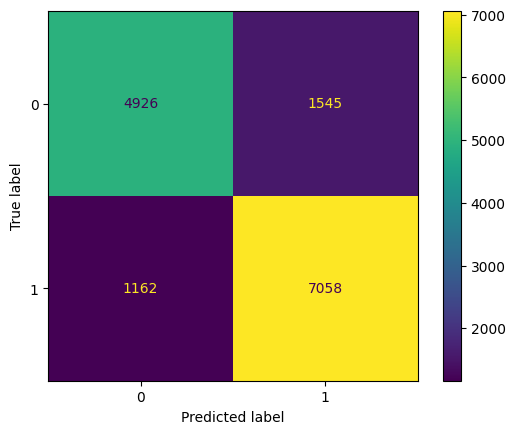

In [125]:
# plotting confusion matrix

cm = confusion_matrix(y_test, y_prediction_lr, labels = pipe.classes_)

ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = pipe.classes_).plot()
plt.show()

In [126]:
print(classification_report(y_test, y_prediction_lr))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      6471
           1       0.82      0.86      0.84      8220

    accuracy                           0.82     14691
   macro avg       0.81      0.81      0.81     14691
weighted avg       0.82      0.82      0.82     14691



## Cross-Validation

In [127]:
from sklearn.model_selection import cross_validate

In [128]:
# performing cross validation

cross_val = cross_validate(pipe, X_train, y_train, cv = 10)

In [129]:
cross_val["test_score"]

array([0.82099711, 0.81214906, 0.81487153, 0.82420014, 0.82079646,
       0.81415929, 0.81041525, 0.82539142, 0.81688223, 0.82437032])

In [130]:
cross_val["test_score"].mean()

0.8184232808424762

In [131]:
X.shape

(73454, 9)

In [132]:
y.shape

(73454,)

In [133]:
pipe.predict_proba(X_test)[28]

array([0.43191339, 0.56808661])

## Manual Shuffling

In [134]:
# now we have to shuffle the data because it can cause bias as it is grouped by id and innings

final_df1 = final_df.sample(final_df.shape[0])

In [135]:
X1 = final_df1.iloc[:,:-1]
y1 = final_df1.iloc[:, -1]

In [136]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

In [137]:
X_train1

,batting_team,bowling_team,city,target_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
77902,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,195,164,100,10,9.300000,9.840000
13277,Lucknow Super Giants,Rajasthan Royals,Mumbai,166,75,34,5,6.348837,13.235294
52491,Delhi Capitals,Kolkata Knight Riders,Kolkata,179,40,29,8,9.164835,8.275862
74420,Sunrisers Hyderabad,Gujarat Titans,Delhi,163,114,79,8,7.170732,8.658228
112961,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,133,13,5,3,6.260870,15.600000
...,...,...,...,...,...,...,...,...,...
31560,Rajasthan Royals,Punjab Kings,Mumbai,222,81,36,6,10.071429,13.500000
53822,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,137,134,117,10,6.000000,6.871795
42087,Kolkata Knight Riders,Delhi Capitals,Sharjah,229,221,111,9,5.333333,11.945946
102760,Rajasthan Royals,Mumbai Indians,Mumbai,167,108,61,5,6.000000,10.622951


In [138]:
y_train1

77902     0
13277     0
52491     1
74420     1
112961    0
         ..
31560     0
53822     0
42087     0
102760    0
47233     0
Name: result, Length: 58763, dtype: int64

## Encoding

In [139]:
ct1 = ColumnTransformer([("ct1",\
                         OneHotEncoder(sparse = False, drop = "first"), ["batting_team", "bowling_team", "city"])],\
                       remainder = "passthrough")


## Logistic Regression

In [140]:
pipe1 = Pipeline(steps = [("step1", ct1), ("step2", LogisticRegression(solver = "liblinear"))])


In [141]:
pipe1.fit(X_train1, y_train1)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ct1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [142]:
X_train1.describe()

,target_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
count,58763.000000,58763.000000,58763.000000,58763.000000,58763.000000,58763.000000
mean,165.552950,92.592363,62.846604,7.581812,7.442424,10.551054
std,29.102976,49.724018,33.223907,2.140266,2.304776,13.718314
min,68.000000,-5.000000,-1.000000,0.000000,0.000000,-360.000000
25%,147.000000,54.000000,35.000000,6.000000,6.276923,7.111111
50%,165.000000,92.000000,63.000000,8.000000,7.500000,8.857143
75%,185.000000,130.000000,92.000000,9.000000,8.666667,10.928571
max,247.000000,247.000000,119.000000,10.000000,60.000000,714.000000


In [143]:
y_prediction_lr1 = pipe.predict(X_test1)

In [144]:
accuracy_score(y_test1, y_prediction_lr1)

0.8150568375195698

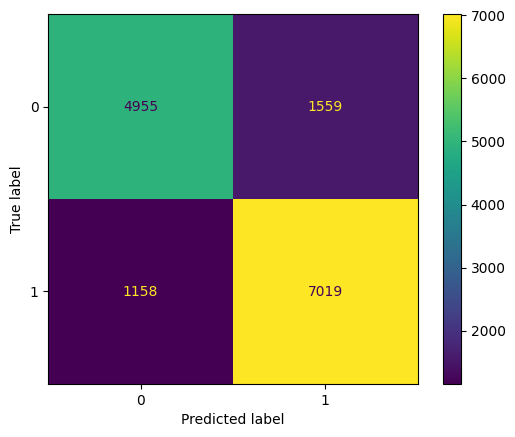

In [145]:
cm1 = confusion_matrix(y_test1, y_prediction_lr1, labels = pipe1.classes_)

ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = pipe.classes_).plot()
plt.show()


In [146]:
print(classification_report(y_test1, y_prediction_lr1))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      6514
           1       0.82      0.86      0.84      8177

    accuracy                           0.82     14691
   macro avg       0.81      0.81      0.81     14691
weighted avg       0.81      0.82      0.81     14691



## Cross-Validation

In [147]:
cross_val1 = cross_validate(pipe1, X_train1, y_train1, cv = 10)

In [148]:
cross_val1["test_score"]

array([0.82695253, 0.80755487, 0.81861494, 0.81926481, 0.82113683,
       0.82164738, 0.81552076, 0.8182437 , 0.81926481, 0.82896528])

In [149]:
cross_val1["test_score"].mean()

0.8197165908383027

In [150]:
X1.shape

(73454, 9)

In [151]:
y1.shape

(73454,)

In [152]:
pipe1.predict_proba(X_test1)[5]

array([0.10248946, 0.89751054])

## Pickling

In [153]:
import pickle


In [154]:
# serializing the code for deployment

#pickle.dump(pipe, open("LR_With_10_inputs.pkl", "wb"))